# Libraries imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# FashionMNIST dataset load:

In [5]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 5s 1us/step


# Visualise some data

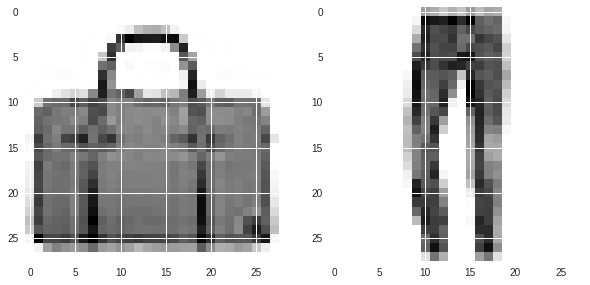

In [7]:
f = plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28,28]))

ax = plt.subplot(1, 2, 2)
i = np.random.randint(0, X_train.shape[0], 1)
ax.imshow(X_train[i].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [10]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5774

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

# Accuracy depeding on number of components

In [0]:
pca_steps = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]

from sklearn.externals.joblib import Parallel, delayed


def get_pca_pred(n_repeat, pca_step):
  result_step = []
  for i in range(n_repeat):

      pca = PCA(n_components=pca_step)
      used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
      X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))

      lr = LogisticRegression()
      lr.fit(X_train_lowdim, y_train[used_indices])

      acc = accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))
      result_step.append(acc)
      
  return result_step
      
      
results = Parallel(n_jobs=10)(delayed(get_pca_pred)(5, i) for i in pca_steps)

In [16]:
results

[[0.5769],
 [0.6747],
 [0.6929],
 [0.7482],
 [0.7748],
 [0.7881],
 [0.8028],
 [0.8102],
 [0.818],
 [0.8174]]

In [0]:
results = np.array(results)

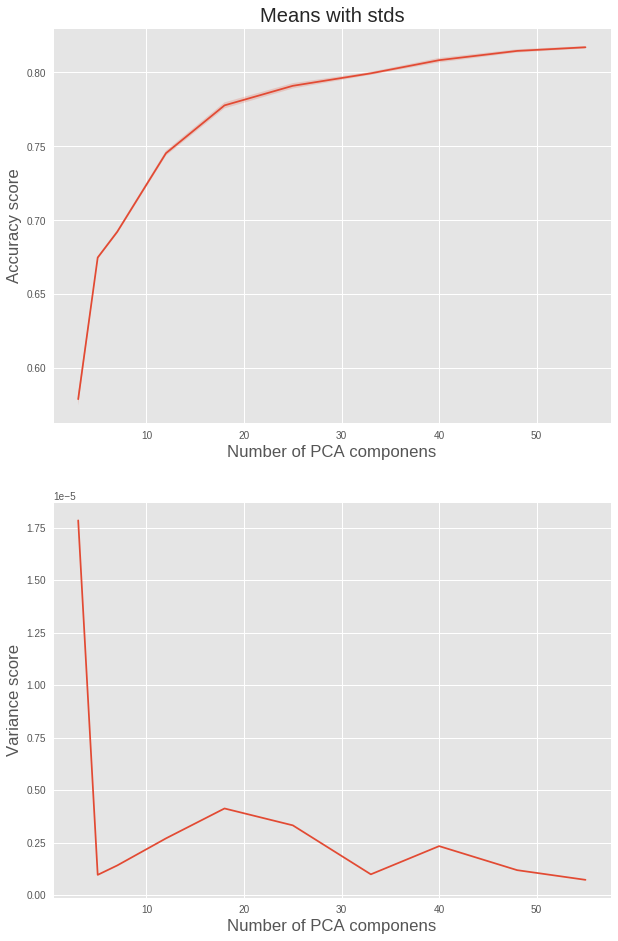

In [25]:
plot_means_std(results, pca_steps, xlabel='Number of PCA componens')

# Accuracy depeding on train set size

In [0]:
### Your code here

steps = np.hstack([np.arange(10, 200, 20),
                   np.arange(200, 1000, 50),
                   np.arange(1000, 2000, 100)])
n_repeat = 6

results = []
for step in tqdm(steps):
    result_step = []
    for i in range(n_repeat):
        
        used_indices = np.random.choice(np.arange(X_train.shape[0]), step, replace=False)
        
        lr = LogisticRegression()
        lr.fit(X_train[used_indices].reshape([-1, 784]), y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(X_test.reshape([-1, 784])))
        result_step.append(acc)
    results.append(result_step)

100%|██████████| 36/36 [03:59<00:00,  6.64s/it]


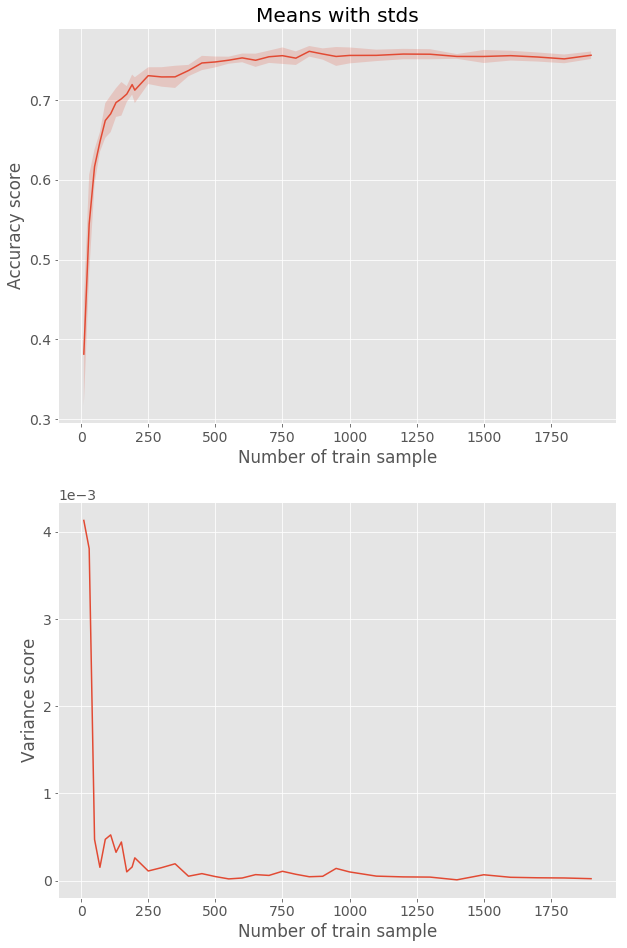

In [0]:
plot_means_std(results, steps, xlabel='Number of train sample')

# Accuracy depeding on number of features used

In [0]:
### Your code here

steps = np.arange(5, 101, 5) / 100
n_sample = 1000
n_repeat = 6

results = []
for step in tqdm(steps):
    result_step = []
    for i in range(n_repeat):
        
        used_indices = np.random.choice(np.arange(X_train.shape[0]), n_sample, replace=False)
        used_feature = np.random.choice(np.arange(784), int(784 * step), replace=False)
        
        lr = LogisticRegression()
        lr.fit(X_train[used_indices].reshape([-1, 784])[:,used_feature], y_train[used_indices])
        
        acc = accuracy_score(y_test, lr.predict(X_test.reshape([-1, 784])[:,used_feature]))
        result_step.append(acc)
    results.append(result_step)

100%|██████████| 20/20 [02:39<00:00,  7.98s/it]


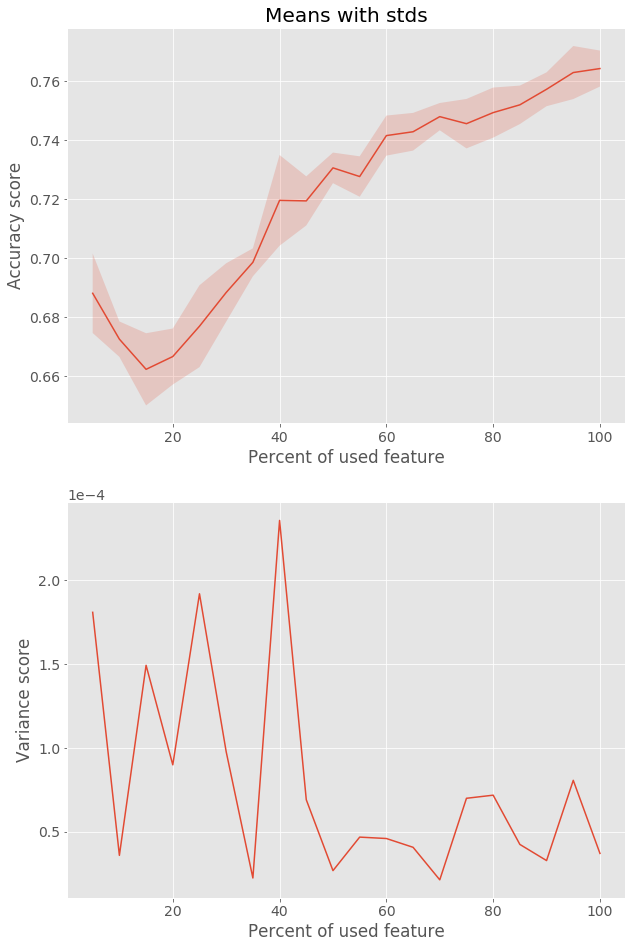

In [0]:
plot_means_std(results, steps * 100, xlabel='Percent of used feature')